In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
anonymity = pd.read_csv('./data/AnonymityPoll.csv')

In [6]:
# How many people participated in the poll?
len(anonymity)

1002

In [8]:
# How many interviewees responded that they use a smartphone?
anonymity.Smartphone.sum()

487.0

In [15]:
# How many interviewees responded that they don't use a smartphone?
nan_smartphone = anonymity.Smartphone.isnull().sum()
len(anonymity) - nan_smartphone - anonymity.Smartphone.sum()

472.0

In [16]:
# How many interviewees did not respond to the question, resulting in a missing value, or NA, in the summary() output?
nan_smartphone

43

In [20]:
# Group by sex and region
anonymity.groupby(['Sex', 'Region']).size()

Sex     Region   
Female  Midwest      123
        Northeast     90
        South        176
        West         116
Male    Midwest      116
        Northeast     76
        South        183
        West         122
dtype: int64

In [37]:
# Midwest
midwest = anonymity.loc[(anonymity.Region == 'Midwest')]
midwest.groupby('State').size()

# South
south = anonymity.loc[(anonymity.Region == 'South')]
south.groupby('State').size().sort_values(ascending=False)

72

In [38]:
# Get internet and smartphones relation
anonymity.groupby(['Internet.Use', 'Smartphone']).size()

958

In [43]:
# How many interviewees have a missing value for their Internet use?
len(anonymity) - anonymity.groupby(['Internet.Use']).size().sum()

1

In [44]:
# How many interviewees have a missing value for their smartphone use?
len(anonymity) - anonymity.groupby(['Smartphone']).size().sum()

43

In [46]:
# How many interviewees are in the new data frame?
limited = anonymity.loc[(anonymity['Internet.Use'] == 1) | (anonymity.Smartphone == 1)]
len(limited)

792

In [50]:
# Which variables have missing values in the limited data frame? 
pd.isnull(limited).any()

Internet.Use              False
Smartphone                 True
Sex                       False
Age                        True
State                     False
Region                    False
Conservativeness           True
Info.On.Internet          False
Worry.About.Info           True
Privacy.Importance         True
Anonymity.Possible         True
Tried.Masking.Identity     True
Privacy.Laws.Effective     True
dtype: bool

In [52]:
# What is the average number of pieces of personal information on the Internet,
# according to the Info.On.Internet variable?

limited['Info.On.Internet'].mean()

3.7954545454545454

In [60]:
# How many interviewees reported a value of 0 for Info.On.Internet?
(limited['Info.On.Internet'] == 0).sum()

105

In [61]:
# How many interviewees reported the maximum value of 11 for Info.On.Internet?
(limited['Info.On.Internet'] == 11).sum()

8

In [68]:
# What proportion of interviewees who answered the Worry.About.Info question
# worry about how much information is available about them on the Internet? 

worried = limited.groupby('Worry.About.Info').size()
worried[1]/worried.sum()

0.48860759493670886

In [71]:
# What proportion of interviewees who answered the Anonymity.Possible question
# think it is possible to be completely anonymous on the Internet?

anon_possible = limited.groupby('Anonymity.Possible').size()
anon_possible[1]/anon_possible.sum()

0.36918990703851262

In [72]:
# What proportion of interviewees who answered the Tried.Masking.Identity
# question have tried masking their identity on the Internet?

masking = limited.groupby('Tried.Masking.Identity').size()
masking[1]/masking.sum()

0.16326530612244897

In [73]:
# What proportion of interviewees who answered the Privacy.Laws.Effective
# question find United States privacy laws effective?

privacy = limited.groupby('Privacy.Laws.Effective').size()
privacy[1]/privacy.sum()

0.25584594222833562

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cc8f6d8>]], dtype=object)

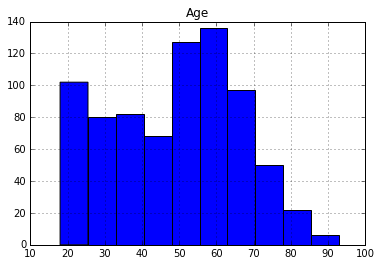

In [74]:
# What is the best represented age group in the population?
limited.hist('Age')